In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

Przygotować programy do aproksymacji średniokwadratowej (dyskretnej) wielomianami algebraicznymi.

Zadana funkcja

In [3]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * math.cos(1.5 * x)

f_range_a = -4 * math.pi
f_range_b = 4 * math.pi

Rysowanie funkcji

In [156]:
def plot_function(func, range_a, range_b, title, color):
    
    func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = [func(func_x[i]) for i in range(len(func_x))]

    plt.plot(func_x, func_y, label = title, color = color)

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Aproksymacja wielomianowa

![title](img_vsc/img01.png)

![title](img_vsc/img02.png)

![title](img_vsc/img03.png)

![title](img_vsc/img04.png)

In [129]:
def calculate_approx(xs, ys, m, w):
    
    G = np.zeros((m, m))
    B = np.zeros(m)
    
    for j in range(m):
        for k in range(m):
            
            G[j][k] = sum([w[i] * (xs[i] ** (j + k)) for i in range(len(xs))])
        
        B[j] = sum([w[i] * ys[i] * (xs[i] ** j) for i in range(len(xs))])
   
    A = np.linalg.solve(G, B) # Nie działa dla macierzy z wyznacznikiem = 0
    #A, _, _, _ = np.linalg.lstsq(G, B) # Daje złe wyniki
    
    
    return lambda x : sum([A[i] * (x ** i) for i in range(m)])

In [154]:
def draw_approx(n, m, w):
    xs = np.linspace(f_range_a, f_range_b, n)
    ys = [f(xs[i]) for i in range(len(xs))]
    
    calculated_function = calculate_approx(xs, ys, m, w)
    calculated_ys = [calculated_function(xs[i]) for i in range(len(xs))]

    plot_function(f, f_range_a, f_range_b, "Zadana funkcja", "blue")
    
    plot_function(calculated_function, f_range_a, f_range_b, "Funkcja aproksymująca", "red")
    
    #plt.plot(xs, calculated_ys, color = 'red', label = "Funkcja Funkcja interpolowana")
    plt.scatter(xs, ys, color = 'black', label = "Nodes")
    plt.title("Function approximation")
    plt.legend()
    plt.grid(True)
    plt.savefig("approximation.png")
    plt.show()

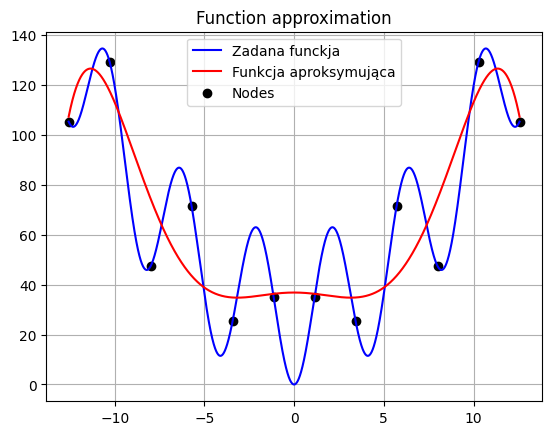

In [157]:
draw_approx(12,8, [1 for _ in range(12)])

In [127]:
def approx(n, m, w):
    xs = np.linspace(f_range_a, f_range_b, n)
    ys = [f(xs[i]) for i in range(len(xs))]
    
    calculated_function = calculate_approx(xs, ys, m, w)

    return calculated_function

Sposoby obliczania błędów aproksymacji

Błąd maksymalny

In [95]:
def approximation_maximum_difference(n, m, test_points = 1000):

    maksimum = float('-inf')

    #Evenly distributed xs
    xs = np.linspace(f_range_a, f_range_b, test_points)
        
    approx_function = approx(n, m, [1 for _ in range(n)])

    for i in range(test_points):

        temp = abs(f(xs[i]) - approx_function(xs[i]))

        maksimum = temp if temp > maksimum else maksimum
    
    return maksimum

In [161]:
def calculate_maximum_difference():

    for n in range(3, 100):
        for m in range(1, n + 1):
            print(n, m, approximation_maximum_difference(n, m, 1000))

In [160]:
calculate_maximum_difference()

3 1 70.17840792908379
3 2 70.17840792908379
3 3 59.99866494451235
4 1 76.10615599517017
4 2 76.10615599517018
4 3 59.9986649445123
4 4 59.998664944512356
5 1 76.63244454936935
5 2 76.63244454936935
5 3 42.81668725671406
5 4 42.81668725671406
5 5 79.10274521604
6 1 74.12325187342648
6 2 74.12325187342648
6 3 49.76664102988332
6 4 49.76664102988332
6 5 59.54404979334076
6 6 59.54404979334076
7 1 87.80346491497978
7 2 87.8034649149798
7 3 59.99866494451233
7 4 59.99866494451236
7 5 59.998664944512385
7 6 59.99866494451278
7 7 59.99866494451862
8 1 71.36274595806316
8 2 71.36274595806316
8 3 50.23691057126733
8 4 50.23691057126733
8 5 59.25074685058378
8 6 59.25074685058378
8 7 59.98332765229729
8 8 59.983327652297305
9 1 70.5261295261788
9 2 70.5261295261788
9 3 40.932213804673054
9 4 40.93221380467304
9 5 46.96090424026987
9 6 46.96090424026988
9 7 55.11091274868676
9 8 55.11091274868767
9 9 46.33933193694029
10 1 69.88468711619467
10 2 69.88468711619467
10 3 38.99774051722534
10 4 38.99

In [174]:
def approximation_mean_difference(n, m, test_points = 1000):

    suma = 0

    xs = np.linspace(f_range_a, f_range_b, test_points)
        
    approx_function = approx(n, m, [1 for _ in range(n)])

    for i in range(test_points):

        suma += (f(xs[i]) - approx_function(xs[i]))
    
    return(f"{suma / test_points}")

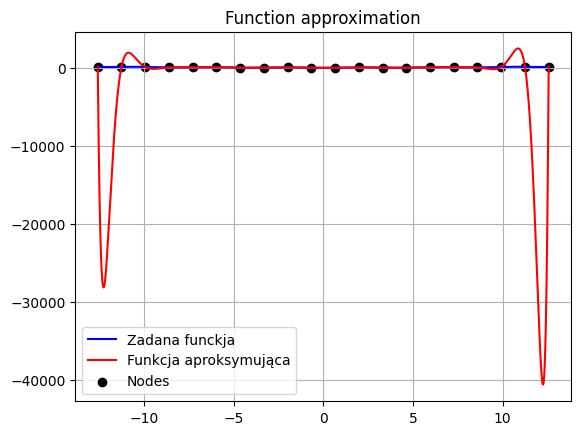

In [175]:
draw_approx(20, 28, [1 for i in range(20)])

In [244]:
def errors(n, desc):
    
    max_diff = [approximation_maximum_difference(n, m, 100) for m in range(3, n + 1)]
    mean_diff = [approximation_mean_difference(n, m, 100) for m in range(3, n + 1)]
    
    if desc == True:
    
        print("degree | max diff | mean diff")
        for i in range(len(max_diff)):
            print(i + 3, " | ", max_diff[i], " | ", mean_diff[i])
    
    else:
        
        print("max diff")
        for x in max_diff:
            print(x)
        print("mean diff")
        for x in mean_diff:
            print(x)

In [172]:
def analyse(n, m, test_points = 1000):
    
    print("Max: ", approximation_maximum_difference(n, m, test_points), "Mean: ", approximation_mean_difference(n, m, test_points))
    draw_approx(n, m, [1 for _ in range(n)])

In [246]:
errors(10, True)

degree | max diff | mean diff
3  |  38.983616730535886  |  1.3053719008264695
4  |  38.983616730535886  |  1.3053719008264693
5  |  40.97076676758145  |  -0.7761969810806003
6  |  40.970766767581516  |  -0.7761969810806002
7  |  40.09385063368658  |  -2.9993452384652453
8  |  40.093850633689435  |  -2.9993452384653927
9  |  86.82487845755685  |  7.150336018642151
10  |  86.82487846160473  |  7.150336018641781


In [245]:
errors(10, False)

max diff
38.983616730535886
38.983616730535886
40.97076676758145
40.970766767581516
40.09385063368658
40.093850633689435
86.82487845755685
86.82487846160473
mean diff
1.3053719008264695
1.3053719008264693
-0.7761969810806003
-0.7761969810806002
-2.9993452384652453
-2.9993452384653927
7.150336018642151
7.150336018641781


Max:  59.99866494451235 Mean:  29.970000000000056


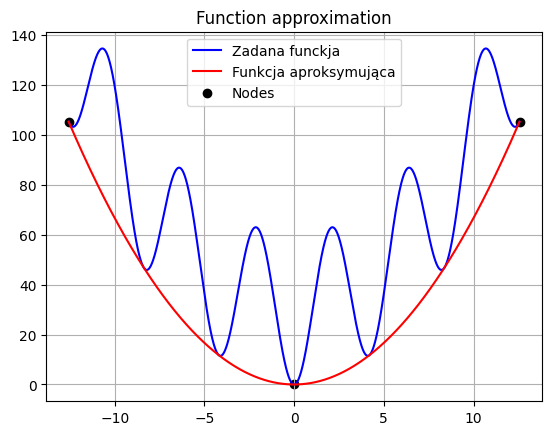

In [178]:
analyse(3, 3)

Max:  38.99774051722534 Mean:  1.449729729729756


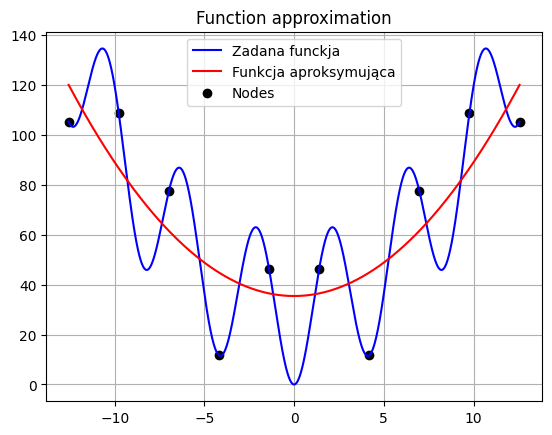

In [210]:
analyse(10, 3)

Max:  41.44606971077043 Mean:  -0.7664025822755595


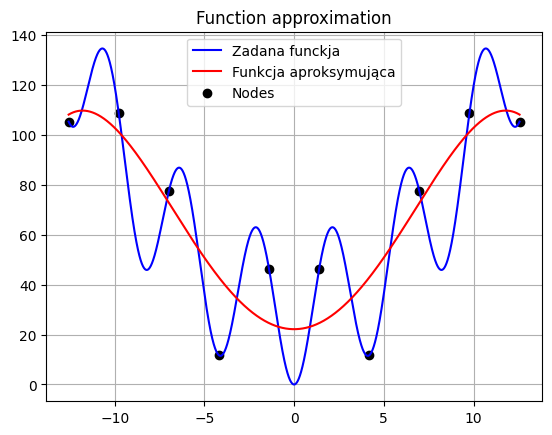

In [211]:
analyse(10, 5)

Max:  40.09997564215759 Mean:  -3.059750054300342


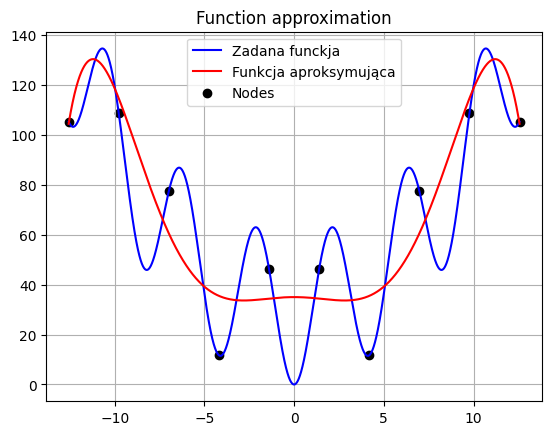

In [212]:
analyse(10, 8)

Max:  87.07070031084743 Mean:  7.292049203257772


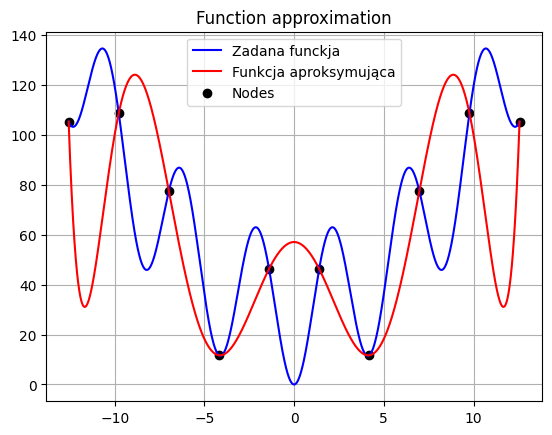

In [213]:
analyse(10, 10)

In [248]:
errors(20, True)

degree | max diff | mean diff
3  |  35.00350308827548  |  0.8914818609832832
4  |  35.00350308827548  |  0.8914818609832821
5  |  34.14564655460248  |  0.3766946127506687
6  |  34.14564655460254  |  0.3766946127506688
7  |  34.28156138060122  |  -0.2620900118843943
8  |  34.2815613806015  |  -0.2620900118843407
9  |  33.713243298646  |  -0.9075415578514804
10  |  33.713243298645494  |  -0.9075415578514792
11  |  31.689474815704102  |  -1.171532483612425
12  |  31.689474815703313  |  -1.1715324836119976
13  |  37.90074551953536  |  1.3860766516372365
14  |  37.900745521634164  |  1.3860766516111442
15  |  307.1244372190358  |  15.804321031140738
16  |  307.12469823868787  |  15.804321029926623
17  |  1212.0702409507633  |  -63.72166755902
18  |  1212.4027058378565  |  -63.72160357154163
19  |  3035.1523413387204  |  154.32914872521638
20  |  3226.3847902216094  |  154.31184461044518


In [249]:
errors(20, False)

max diff
35.00350308827548
35.00350308827548
34.14564655460248
34.14564655460254
34.28156138060122
34.2815613806015
33.713243298646
33.713243298645494
31.689474815704102
31.689474815703313
37.90074551953536
37.900745521634164
307.1244372190358
307.12469823868787
1212.0702409507633
1212.4027058378565
3035.1523413387204
3226.3847902216094
mean diff
0.8914818609832832
0.8914818609832821
0.3766946127506687
0.3766946127506688
-0.2620900118843943
-0.2620900118843407
-0.9075415578514804
-0.9075415578514792
-1.171532483612425
-1.1715324836119976
1.3860766516372365
1.3860766516111442
15.804321031140738
15.804321029926623
-63.72166755902
-63.72160357154163
154.32914872521638
154.31184461044518


Max:  34.59781069798626 Mean:  0.4843662596789111


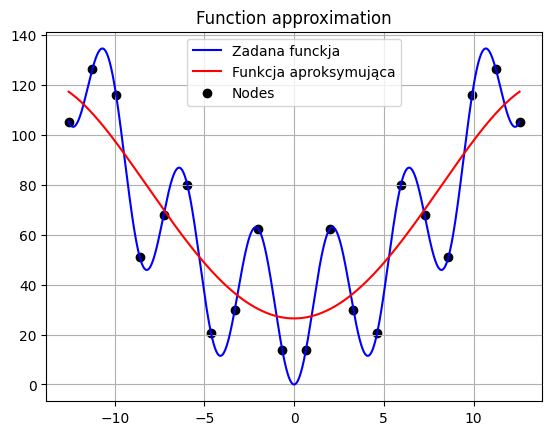

In [214]:
analyse(20, 5)

Max:  31.689474815703306 Mean:  -1.2346141364362568


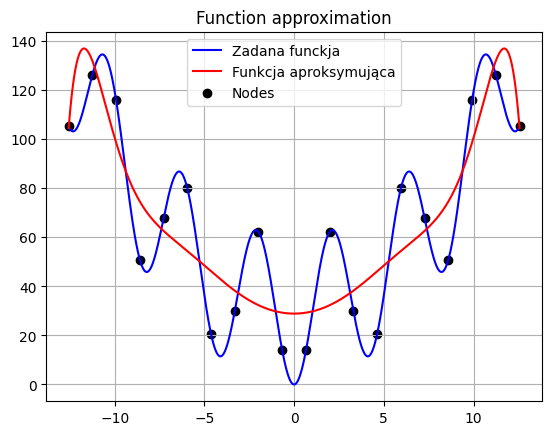

In [233]:
analyse(20, 12)

Max:  38.51366395923144 Mean:  1.4714539679957954


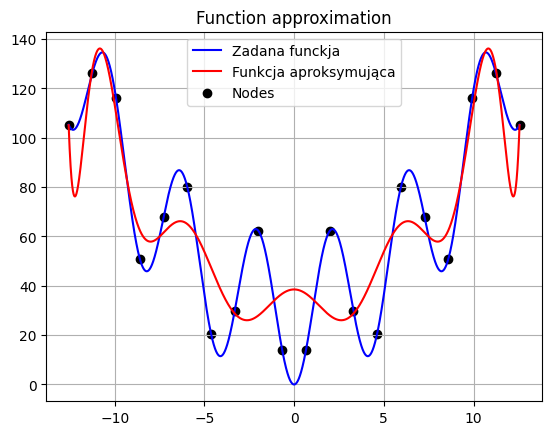

In [259]:
analyse(20, 14)

Max:  3365.4010427966637 Mean:  165.53749642080138


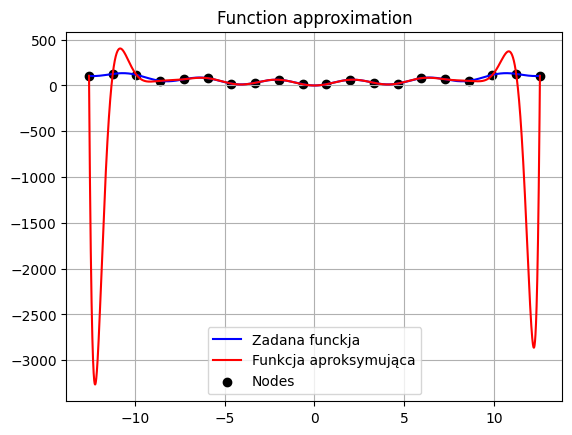

In [217]:
analyse(20, 20)

In [260]:
errors(30, True)

degree | max diff | mean diff
3  |  33.71241312441376  |  0.5664121237090615
4  |  33.71241312441376  |  0.5664121237090606
5  |  33.60351124758554  |  0.2942844002944993
6  |  33.60351124758552  |  0.29428440029449887
7  |  33.934972688345646  |  -0.09296100368490982
8  |  33.934972688345546  |  -0.09296100368491082
9  |  32.823449001214705  |  -0.4400178209180702
10  |  32.823449001214826  |  -0.44001782091806946
11  |  33.2393934408174  |  -0.4143405253970282
12  |  33.23939344106064  |  -0.41434052539632377
13  |  37.169701439824806  |  0.4058358869585524
14  |  37.169701457956904  |  0.40583588695437156
15  |  42.6661997565478  |  1.2661766134327581
16  |  42.66620643203754  |  1.2661766134387265
17  |  112.79523842848553  |  -3.388929401439315
18  |  112.79712850301598  |  -3.3889302965426356
19  |  150.80375370933493  |  4.533778151499999
20  |  151.09710841046842  |  4.533842876462236
21  |  161.6626525279991  |  -4.8029299934128105
22  |  190.16609127187814  |  -4.819810314308

In [261]:
errors(30, False)

max diff
33.71241312441376
33.71241312441376
33.60351124758554
33.60351124758552
33.934972688345646
33.934972688345546
32.823449001214705
32.823449001214826
33.2393934408174
33.23939344106064
37.169701439824806
37.169701457956904
42.6661997565478
42.66620643203754
112.79523842848553
112.79712850301598
150.80375370933493
151.09710841046842
161.6626525279991
190.16609127187814
957.4326191787533
924.0905953618623
1863.0262449736783
3079.5340997166077
2196.5938397067675
21162.172872377647
1008.1198443220072
900.8308533641119
mean diff
0.5664121237090615
0.5664121237090606
0.2942844002944993
0.29428440029449887
-0.09296100368490982
-0.09296100368491082
-0.4400178209180702
-0.44001782091806946
-0.4143405253970282
-0.41434052539632377
0.4058358869585524
0.40583588695437156
1.2661766134327581
1.2661766134387265
-3.388929401439315
-3.3889302965426356
4.533778151499999
4.533842876462236
-4.8029299934128105
-4.8198103143088264
-27.016950349410077
-25.689197906427633
50.256071465733974
62.94081065

Max:  112.99235052252648 Mean:  -3.846549451175476


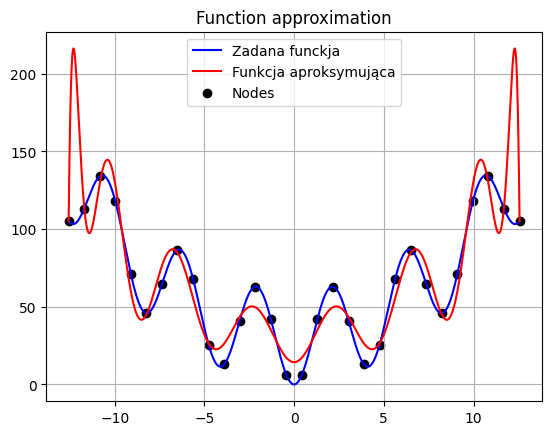

In [277]:
analyse(30, 17)

Max:  33.988487208053755 Mean:  -0.08112476063934923


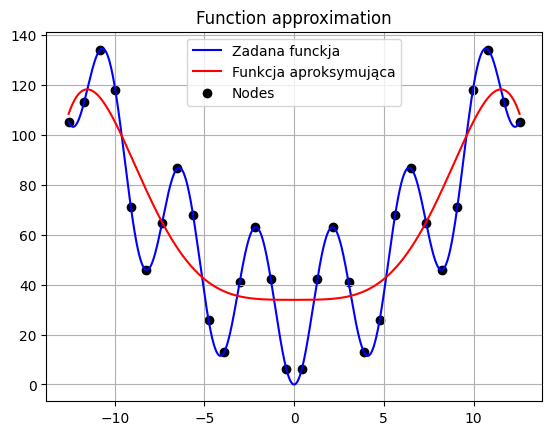

In [218]:
analyse(30, 7)

Max:  112.99235052252648 Mean:  -3.846549451175476


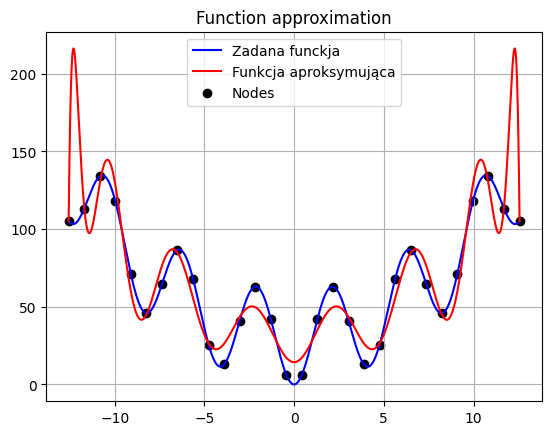

In [219]:
analyse(30, 17)

Max:  963.8647856711299 Mean:  -31.365358794763555


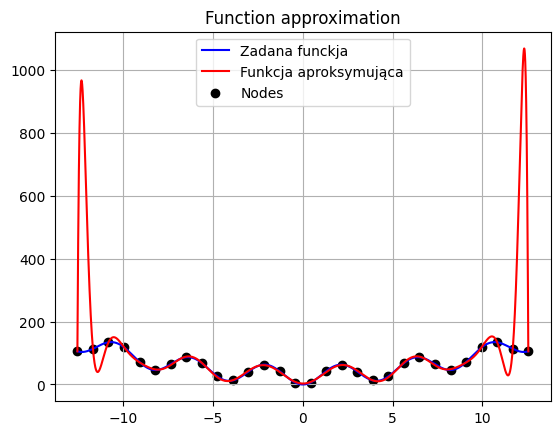

In [220]:
analyse(30, 23)

Max:  918.378430690168 Mean:  25.457486588638385


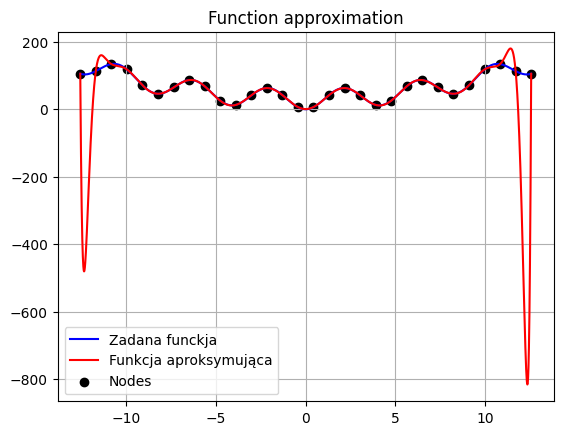

In [221]:
analyse(30, 30)

In [278]:
errors(50, True)

degree | max diff | mean diff
3  |  32.55792906112171  |  0.2595806488267206
4  |  32.557929061121726  |  0.2595806488267206
5  |  33.19482521549569  |  0.1549938325695156
6  |  33.19482521549576  |  0.15499383256951504
7  |  33.89601049814175  |  -0.025185232240982885
8  |  33.89601049814209  |  -0.02518523224098388
9  |  32.92224132962738  |  -0.20342044185441693
10  |  32.92224132962606  |  -0.2034204418543027
11  |  33.394781813681796  |  -0.189398052481312
12  |  33.39478181374202  |  -0.1893980524814102
13  |  36.564693694801264  |  0.11475727063542707
14  |  36.56469369477777  |  0.11475727063508621
15  |  32.64979597309333  |  0.2494571784596595
16  |  32.64979597231114  |  0.2494571784420478
17  |  29.422464016212075  |  -0.4061252858798428
18  |  29.422481243339348  |  -0.4061253075321732
19  |  22.160731746263878  |  0.33385859349010344
20  |  22.16072453991883  |  0.3338575496119496
21  |  12.522935781247867  |  -0.20286995664915558
22  |  12.585155081309608  |  -0.20286716

In [279]:
errors(50, False)

max diff
32.55792906112171
32.557929061121726
33.19482521549569
33.19482521549576
33.89601049814175
33.89601049814209
32.92224132962738
32.92224132962606
33.394781813681796
33.39478181374202
36.564693694801264
36.56469369477777
32.64979597309333
32.64979597231114
29.422464016212075
29.422481243339348
22.160731746263878
22.16072453991883
12.522935781247867
12.585155081309608
15.666091798719066
18.163447183238418
21.724924584765034
19.85106516591793
340.78234751700245
207.2687096762546
119.88069239081062
153.0831603872665
42.96399982963169
30.06421464690189
29.336207970131113
32.24117661415781
77.96804345314573
144.5532205422334
86.72912248698245
90.7024979721447
286.4677697121241
381.0638900884352
6356.142583740961
460.18005880425505
428.7206058249884
1502.527254385788
279.7038001026102
1198.6728180664668
1331.3267312700934
543.3955773673096
2081.0599227826187
988.6998564227559
mean diff
0.2595806488267206
0.2595806488267206
0.1549938325695156
0.15499383256951504
-0.025185232240982885
-

Max:  14.59951752443925 Mean:  -0.292340755793112


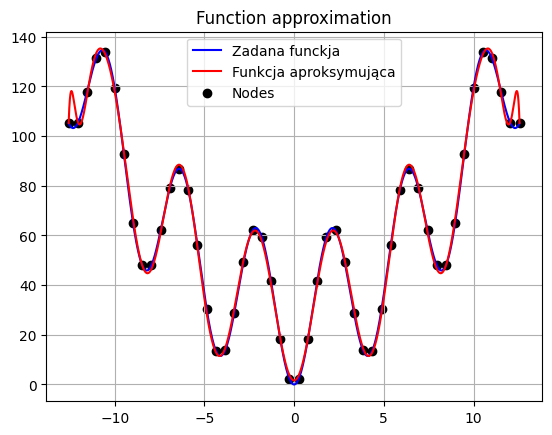

In [295]:
analyse(50, 21)

Max:  39.35784446425451 Mean:  -0.7904855108424045


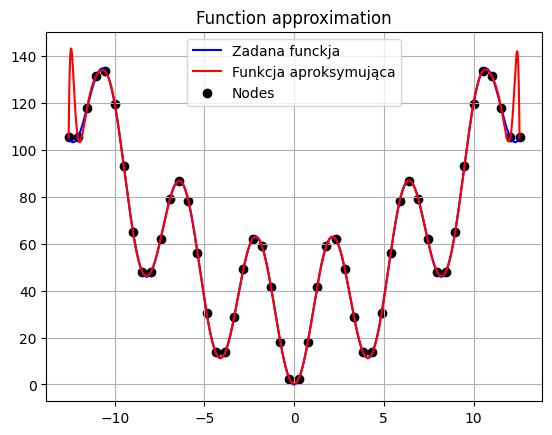

In [296]:
analyse(50, 33)

Max:  9302.163717095273 Mean:  -26.721232352714917


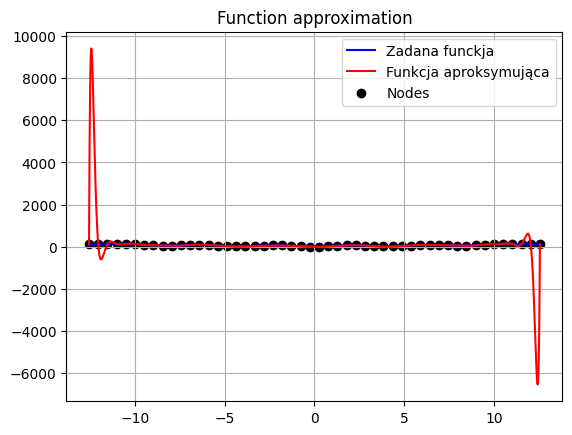

In [297]:
analyse(50, 41)

Max:  1519.5662477626483 Mean:  5.8447114771202235


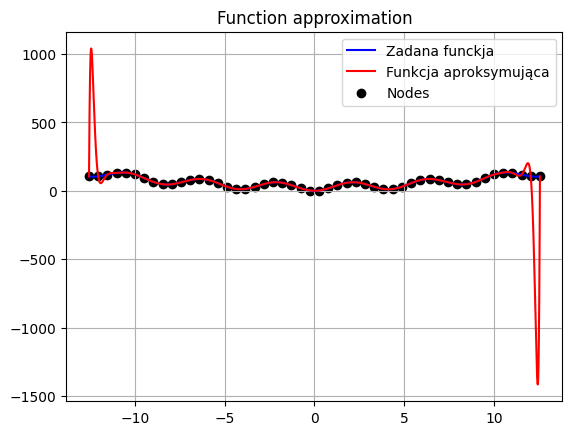

In [298]:
analyse(50, 50)

In [304]:
errors(100, True)

degree | max diff | mean diff
3  |  31.604607831453905  |  -1.3784529073745943e-14
4  |  31.604607831453905  |  -1.4068746168049984e-14
5  |  32.84624282902542  |  -2.5863755581667648e-14
6  |  32.84624282902553  |  -2.5011104298755527e-14
7  |  33.908755684029835  |  1.7053025658242404e-15
8  |  33.90875568402962  |  7.062794793455395e-14
9  |  33.309899311515466  |  1.2150280781497713e-14
10  |  33.309899311516745  |  -4.445865897650947e-13
11  |  33.16043681437412  |  -3.7054803669889224e-13
12  |  33.16043681440772  |  -3.3288927170360695e-13
13  |  36.531083376486436  |  4.361666583463375e-11
14  |  36.531083380477185  |  2.4331967551916023e-11
15  |  32.85280183975519  |  -1.2806253835151437e-11
16  |  32.852801906116625  |  -1.0444267672937713e-11
17  |  18.636857386638347  |  -1.3887468242046452e-09
18  |  18.636873497085347  |  -3.8554226478026976e-10
19  |  9.020096968540997  |  2.166911379219982e-09
20  |  9.023087152038983  |  2.283471189912234e-10
21  |  2.5849870555958887

In [305]:
errors(100, False)

max diff
31.604607831453905
31.604607831453905
32.84624282902542
32.84624282902553
33.908755684029835
33.90875568402962
33.309899311515466
33.309899311516745
33.16043681437412
33.16043681440772
36.531083376486436
36.531083380477185
32.85280183975519
32.852801906116625
18.636857386638347
18.636873497085347
9.020096968540997
9.023087152038983
2.5849870555958887
2.6155483742533363
0.9306559484603696
2.317309466036022
2.8093841486461315
1.5204195421447366
15.27692133809073
34.75630706238189
2.216509024301601
1.7851725841556316
1.82749121046254
2.146517949799133
1.412055585222376
1.5290038885232207
0.7648863594872282
5.205502099991975
2.378483280836406
1.8203151636466686
1.9076444876204874
1.0440425812907392
2.320936252194258
1.9094895360235
2.5399453095947706
1.4608046092848923
4.1560030451515875
2.963416161312523
1.8356263967521613
3.680667868285596
0.8253458672202783
3.6342462725480686
2.008396161603585
3.119867187033151
8.607506243072624
7.819343394406815
168.86114685008556
1.6094093668

Max:  0.9307207904371424 Mean:  0.0007062490599714355


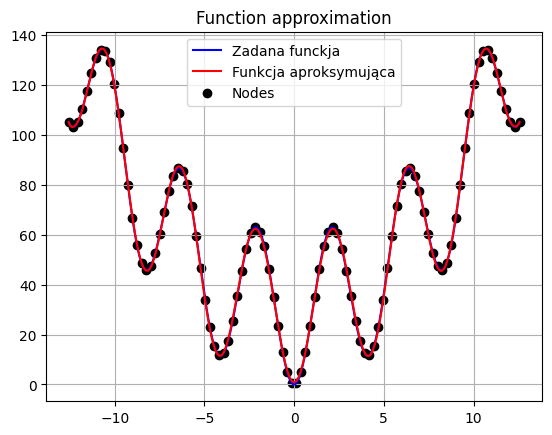

In [310]:
analyse(100, 23)

Max:  78.13734270956013 Mean:  -0.5764057501956736


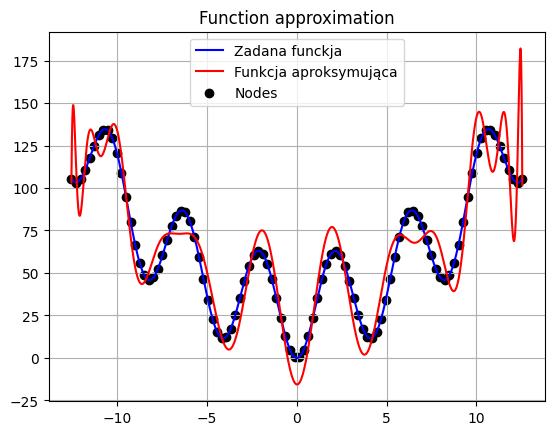

In [311]:
analyse(100, 28)

Max:  14.874646176366781 Mean:  0.12955875632058272


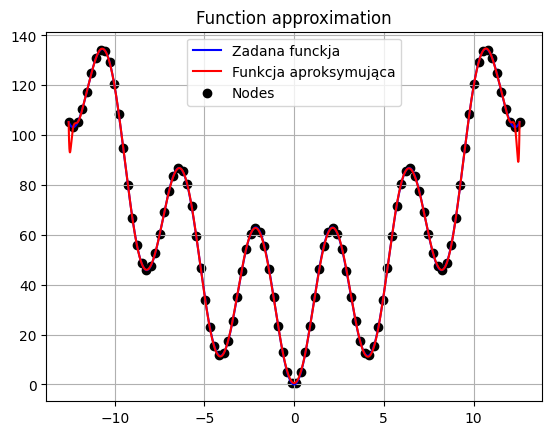

In [312]:
analyse(100, 60)

Max:  988.0317670752358 Mean:  -2.5727804359062714


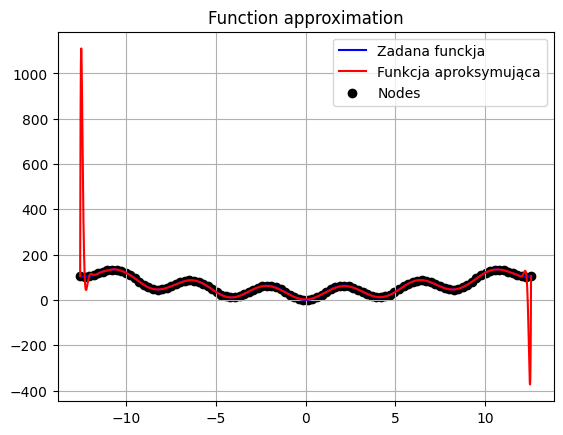

In [313]:
analyse(100, 100)

In [332]:
def errors2(m, desc):
    
    max_diff = [approximation_maximum_difference(n, m, 100) for n in range(m, 100 + 1)]
    mean_diff = [approximation_mean_difference(n, m, 100) for n in range(m, 100 + 1)]
    
    if desc == True:
    
        print("degree | max diff | mean diff")
        for i in range(len(max_diff)):
            print(m + i, " | ", max_diff[i], " | ", mean_diff[i])
    
    else:
        
        print("max diff")
        for x in max_diff:
            print(x)
        print("mean diff")
        for x in mean_diff:
            print(x)

In [319]:
errors2(10, True)

degree | max diff | mean diff
10  |  86.82487846160473  |  7.150336018641781
11  |  55.50708831493887  |  -5.990601989663776
12  |  56.63160555566675  |  -5.182449039083075
13  |  46.386834952831734  |  -3.752282032857803
14  |  38.12901900459616  |  -2.7605609293411946
15  |  36.500153062303305  |  -2.1159355241508866
16  |  35.57618819917725  |  -1.6878769309818238
17  |  34.89152038190126  |  -1.393005007795233
18  |  34.38286717572127  |  -1.18221029095684
19  |  34.00168259522907  |  -1.026330775034861
20  |  33.713243298645494  |  -0.9075415578514792
21  |  33.49305921632792  |  -0.8145830754204276
22  |  33.32377786959745  |  -0.7401131491749289
23  |  33.19296252200639  |  -0.6792023338301274
24  |  33.09157635401293  |  -0.6284530347718597
25  |  33.0129598907445  |  -0.5854678679062253
26  |  32.95213847593753  |  -0.5485193533375761
27  |  32.905348418826804  |  -0.5163391045408007
28  |  32.86970855769858  |  -0.4879799310317645
29  |  32.842989460856295  |  -0.462723592272

In [333]:
errors2(10, False)

max diff
86.82487846160473
55.50708831493887
56.63160555566675
46.386834952831734
38.12901900459616
36.500153062303305
35.57618819917725
34.89152038190126
34.38286717572127
34.00168259522907
33.713243298645494
33.49305921632792
33.32377786959745
33.19296252200639
33.09157635401293
33.0129598907445
32.95213847593753
32.905348418826804
32.86970855769858
32.842989460856295
32.823449001214826
32.809713646288195
32.80069166745497
32.79550892442689
32.79346082298546
32.793975995407564
32.796588576976454
32.80091685217609
32.806646668733244
32.81351845271646
32.82131696969371
32.82986319555886
32.83900782106842
32.84862603105046
32.858613284936254
32.868881888463335
32.87935819433198
32.8899803070167
32.900696192350566
32.9114621128556
32.92224132962606
32.93300302209881
32.94372138239147
32.95437485780424
32.96494551452503
32.97541849790092
32.98578157939038
32.996024770567445
33.00613999644004
33.01612081611211
33.025962185627016
33.035660254485016
33.04521219200366
33.054616038351426
33.06

Max:  33.01295989074451 Mean:  -0.6415211706846344


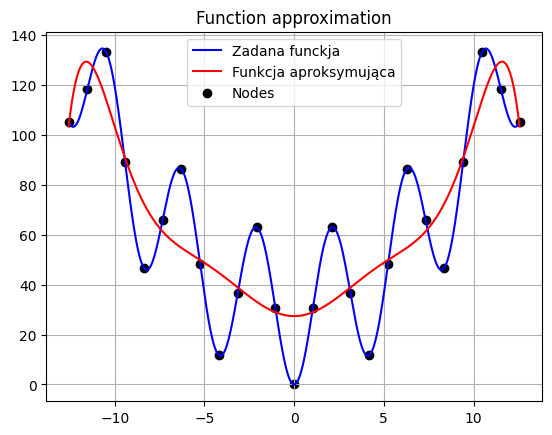

In [326]:
analyse(25,10)

Max:  32.92224132962605 Mean:  -0.3227256808613968


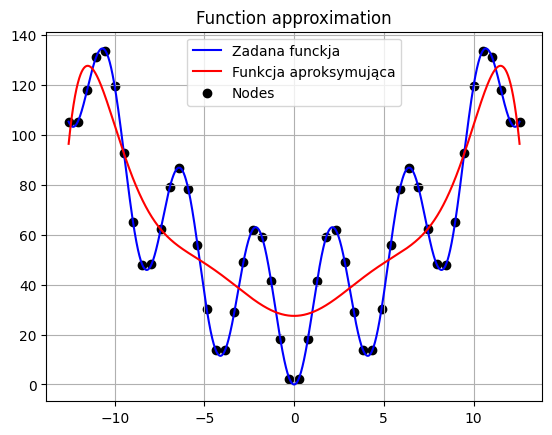

In [327]:
analyse(50,10)

Max:  33.15594550105882 Mean:  -0.23192727985053022


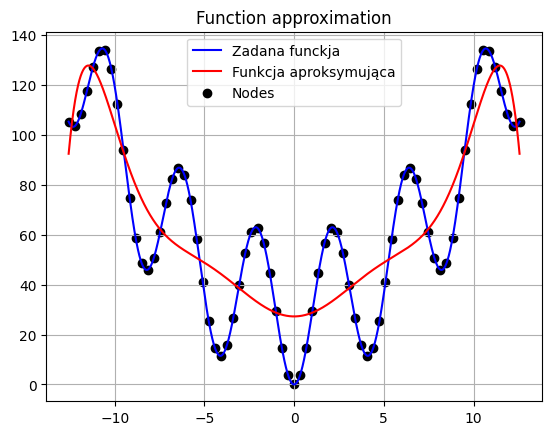

In [328]:
analyse(75,10)

Max:  33.30989931151675 Mean:  -0.1802718586796355


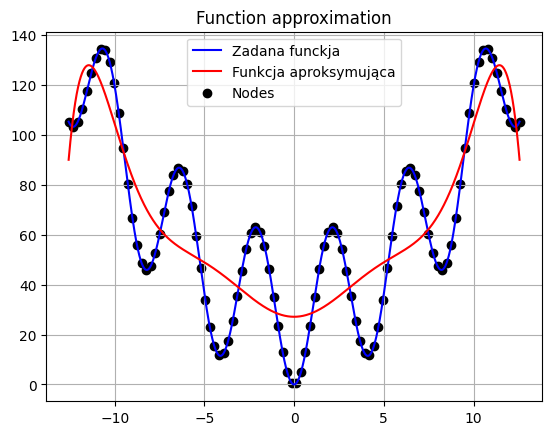

In [329]:
analyse(100,10)

In [335]:
errors2(20, True)

degree | max diff | mean diff
20  |  3226.3847902216094  |  154.31184461044518
21  |  1797.5613476771123  |  82.90673747000936
22  |  1193.429023308434  |  52.09578699962423
23  |  833.9544630980089  |  35.1442330458446
24  |  609.0369212930653  |  24.174232467308308
25  |  453.5831820772718  |  17.159680679635102
26  |  349.0972194653949  |  12.531201532372869
27  |  275.7179340285619  |  9.434567252164047
28  |  221.12557294432472  |  7.251169562133032
29  |  181.05437656009926  |  5.678562854228256
30  |  151.09710841046842  |  4.533842876462236
31  |  127.06659435773315  |  3.6632010422888364
32  |  108.80350832076493  |  3.0144016165974654
33  |  94.17438891320933  |  2.507716395022402
34  |  82.22567151230518  |  2.1065202976990007
35  |  72.45891382169097  |  1.7894873417636603
36  |  64.36029981438642  |  1.5342687152871464
37  |  57.61618351333607  |  1.3245829820767374
38  |  52.072469312523936  |  1.1565863549202757
39  |  47.22012198445691  |  1.0133961164638012
40  |  43.0

In [336]:
errors2(20, False)

max diff
3226.3847902216094
1797.5613476771123
1193.429023308434
833.9544630980089
609.0369212930653
453.5831820772718
349.0972194653949
275.7179340285619
221.12557294432472
181.05437656009926
151.09710841046842
127.06659435773315
108.80350832076493
94.17438891320933
82.22567151230518
72.45891382169097
64.36029981438642
57.61618351333607
52.072469312523936
47.22012198445691
43.085537826728455
39.621484786386844
36.51044652256459
33.861893280336716
31.56647567743346
29.462373630153323
27.64397189234913
26.03892302567226
24.609971201234714
23.33183351962316
22.16072453991883
21.110557440714302
20.188320782135264
19.306922992311712
18.533161059125035
17.825831622127197
17.181945363814293
16.59995388904801
16.044624295840848
15.536806072015537
15.085238879025553
14.661833843555854
14.279504507965953
13.903054976336392
13.57589533469016
13.269948764037423
12.960601807268034
12.69688570041356
12.439671474697974
12.20886679822246
11.991374759675836
11.788325497261724
11.586400398697364
11.406

Max:  456.6259385283034 Mean:  18.978384637315816


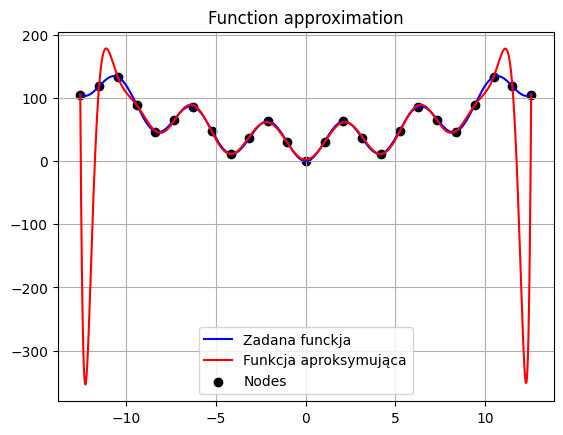

In [337]:
analyse(25,20)

Max:  24.260625569252994 Mean:  0.4725196145684883


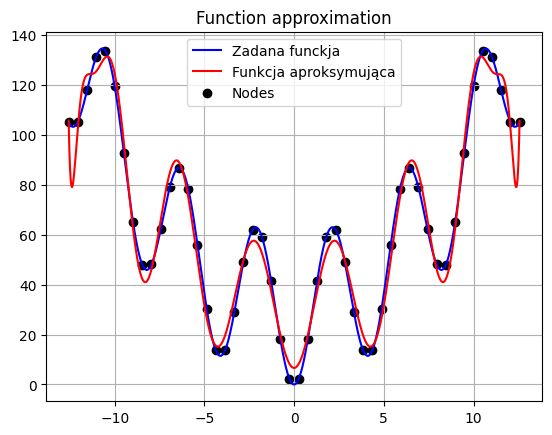

In [338]:
analyse(50,20)

Max:  13.353050009704248 Mean:  0.1681942809249765


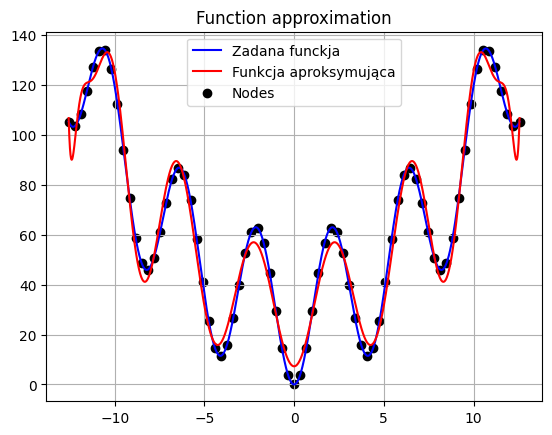

In [339]:
analyse(75,20)

Max:  11.076981484845703 Mean:  0.10911503903565305


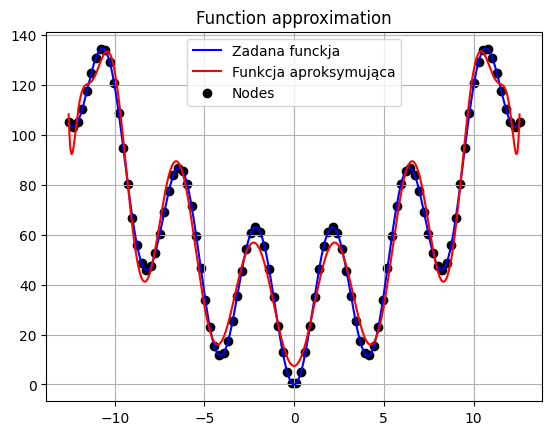

In [340]:
analyse(100,20)

In [342]:
errors2(30, True)

degree | max diff | mean diff
30  |  900.8308533641119  |  21.621881666283457
31  |  2022.3141291494558  |  5.15072270970571
32  |  2085.623795547428  |  57.10160497776137
33  |  552.7722119044355  |  13.573319376354682
34  |  899.8868081489653  |  18.087400031765547
35  |  272.9621507982648  |  -2.158713467349858
36  |  297.366422697056  |  -3.844489607484741
37  |  122.22862055254348  |  -0.22315516873461916
38  |  1016.4763312632293  |  23.249992294191237
39  |  368.8960497266688  |  7.66475200462168
40  |  954.5003106723615  |  19.276520214434644
41  |  69.29323190086703  |  -0.7045204747490997
42  |  734.4008689542226  |  -9.053911297144731
43  |  54.327931168574764  |  -0.015412455225754797
44  |  185.25307583817798  |  3.349325070772106
45  |  239.4245349961258  |  -4.678472684821037
46  |  15.382830303134938  |  0.2076078568673132
47  |  345.0605530239717  |  6.407374923491427
48  |  68.93037537022778  |  1.186094998512939
49  |  279.32440602904364  |  -4.741731179513025
50  | 

In [343]:
errors2(30, False)

max diff
900.8308533641119
2022.3141291494558
2085.623795547428
552.7722119044355
899.8868081489653
272.9621507982648
297.366422697056
122.22862055254348
1016.4763312632293
368.8960497266688
954.5003106723615
69.29323190086703
734.4008689542226
54.327931168574764
185.25307583817798
239.4245349961258
15.382830303134938
345.0605530239717
68.93037537022778
279.32440602904364
153.0831603872665
73.15703688663612
3.8343763227732097
7.1273774471791285
10.38187964065753
52.93774068823964
41.68661067829646
36.20525614681367
40.02380823166291
0.8901494492294262
7.97866812217228
7.363246128750575
11.991309049857705
7.669637074081152
6.642868992230575
12.160246507350308
5.394104378267144
13.053569657580852
3.306427241155802
5.4389433042071005
3.518320404838846
5.678624650083407
6.24720359439209
1.7140996999497986
3.4217215097434064
3.138452406243374
3.3448736562551176
2.857255670327646
10.684808245014324
3.4340648139751693
1.7379062378878416
1.6702133855707473
0.9630466380314431
1.062743796819774


Max:  2157.9117909490637 Mean:  68.53766001708763


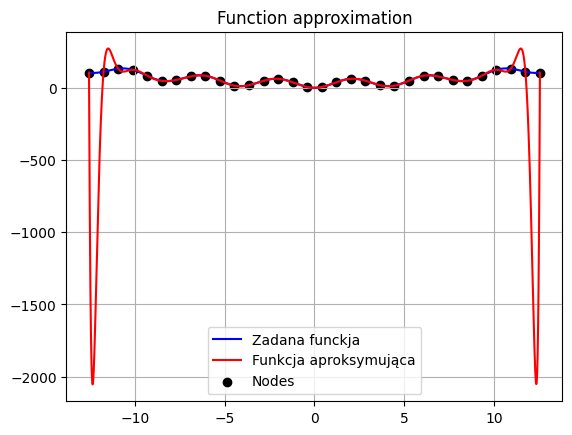

In [350]:
analyse(32, 30)

Max:  5.887295174759885 Mean:  -0.01402626216318282


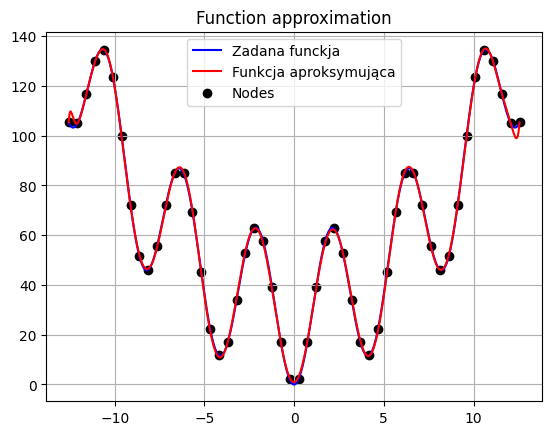

In [351]:
analyse(52,30)

Max:  1.8594638768478262 Mean:  -0.009113159267894516


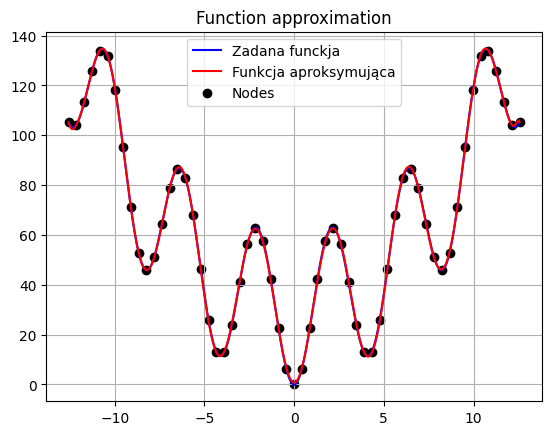

In [352]:
analyse(59,30)

Max:  4.709185907129381 Mean:  -0.04013846015482404


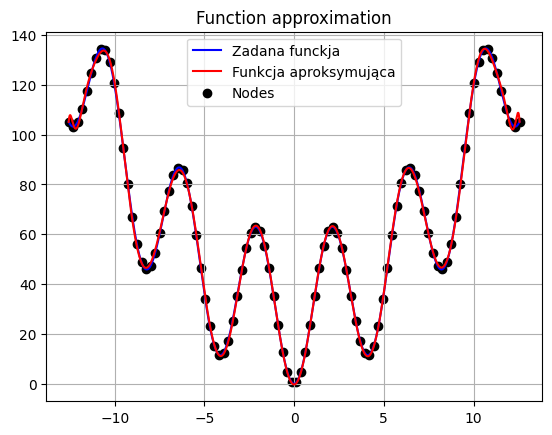

In [353]:
analyse(100, 30)

In [355]:
errors2(50, True)

degree | max diff | mean diff
50  |  988.6998564227559  |  3.657444074582117
51  |  1340.111992342483  |  -16.165225071669763
52  |  114778.08316715239  |  565.3051802431904
53  |  738.8505925828666  |  12.258445602069735
54  |  816.6340497843065  |  13.977439201858964
55  |  4990.748639158819  |  77.46816572718198
56  |  668.9437559423112  |  11.0985096791201
57  |  1337.464670932766  |  18.263062238578915
58  |  209.62235124004826  |  3.16936570023643
59  |  93.61383356657632  |  1.0927675144228701
60  |  38.78051565509111  |  0.4800200723062331
61  |  600.0983725699206  |  6.212550719323181
62  |  515.41294308318  |  -1.0580375280708905
63  |  293.85045119197287  |  -4.215614992062465
64  |  308.1360172321164  |  4.682481116041249
65  |  193.0666693945806  |  -2.791645214610801
66  |  3761.2417929005733  |  -38.59049737093257
67  |  154.6676417001598  |  1.5052628020043153
68  |  160.43697155072172  |  0.4161181033808113
69  |  39.65157821340668  |  -0.5665769971675441
70  |  103.76

In [356]:
errors2(50, False)

max diff
988.6998564227559
1340.111992342483
114778.08316715239
738.8505925828666
816.6340497843065
4990.748639158819
668.9437559423112
1337.464670932766
209.62235124004826
93.61383356657632
38.78051565509111
600.0983725699206
515.41294308318
293.85045119197287
308.1360172321164
193.0666693945806
3761.2417929005733
154.6676417001598
160.43697155072172
39.65157821340668
103.76334872353084
44.28595854723076
23.19117243224005
100.429509384472
8.461094658736215
26.764095358636183
10.432515002698096
58.26524725564934
80.75009087924096
33.225546620700555
39.160103121686774
21.819444026883644
15.098931601883919
11.218046263705986
115.43988050698124
4.265143652066541
50.11830100239436
7.645269560713274
10.717030184257851
2.142583715465804
1.22990363827725
5.247788157399668
5.8977243563550985
4.183349552649929
1.254622374109971
1.4359788578644697
1.6731644188344177
12.845037919172285
5.54144184647015
5.667865353094157
3.6342462725480686
mean diff
3.657444074582117
-16.165225071669763
565.305180

Max:  179320.21574467374 Mean:  960.5326750862878


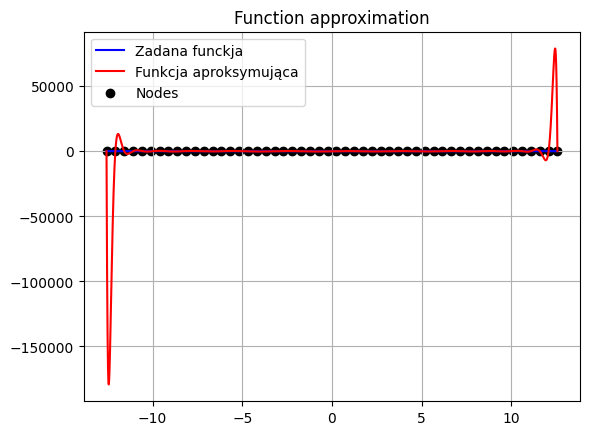

In [361]:
analyse(52,50)

Max:  30.42819751122343 Mean:  -0.01741972661022254


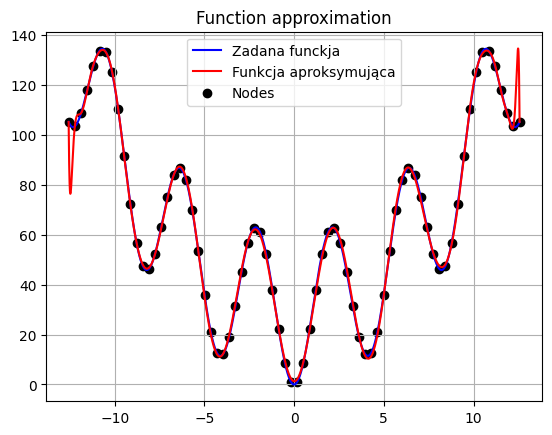

In [362]:
analyse(74,50)

Max:  13.130031763824348 Mean:  0.11322098588770864


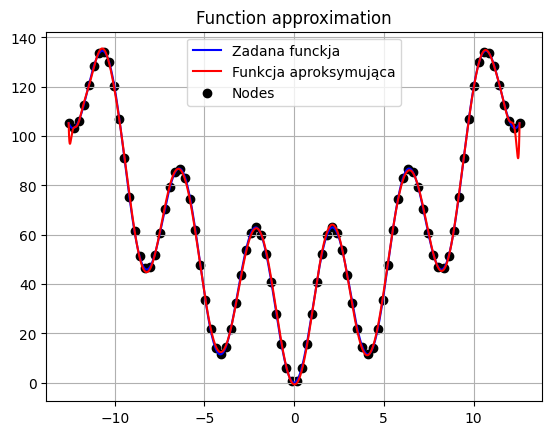

In [363]:
analyse(90,50)

Max:  35.83051850528764 Mean:  -0.05341092510572099


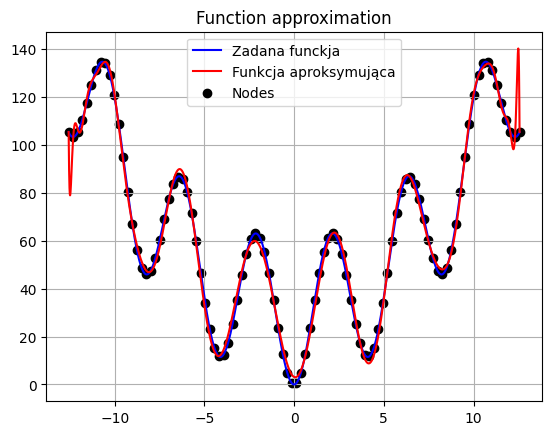

In [364]:
analyse(100,50)

In [379]:
def min_max_max():
    min_val = float('inf')
    min_n = -1
    min_m = -1
    max_val = float('-inf')
    max_n = -1
    max_m = -1
    
    for n in range(3, 100 + 1):
        for m in range(3, n + 1):
            temp = float(approximation_maximum_difference(n, m, 100))

            if temp < min_val:
                min_val = temp
                min_n = n
                min_m = m
                
            if temp > max_val:
                max_val = temp
                max_n = n
                max_m = m
                
    return min_val, min_n, min_m, max_val, max_n, max_m


In [381]:
min, min_n, min_m, max, max_n, max_m = min_max_max()

Max:  0.5014720569615605 Mean:  0.0017181768299556364


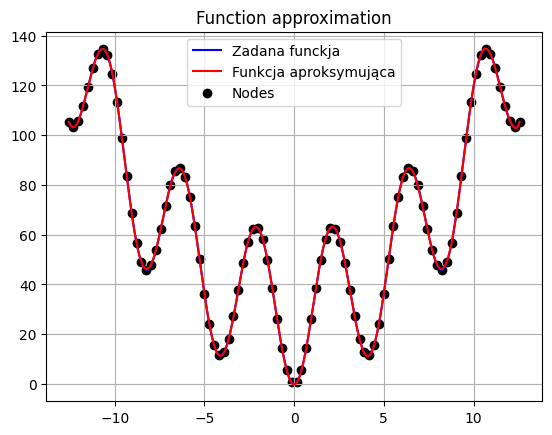

94 26


In [387]:
analyse(min_n, min_m)
print(min_n, min_m)

Max:  176413.32885002135 Mean:  3832.7665755629732


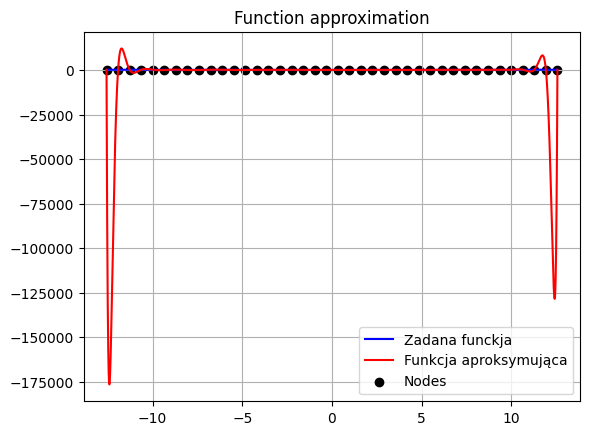

40 37


In [388]:
analyse(max_n, max_m)
print(max_n, max_m)